In [1]:
!pip3 install tensorflow_hub tensorflow scikit-learn pillow numpy opencv-python

In [2]:
import json
import matplotlib.pyplot as plt
import numpy as np
import os
import cv2

TrashNet Image Count: 501


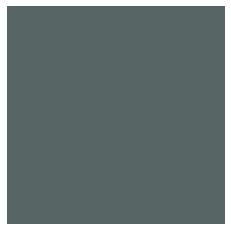

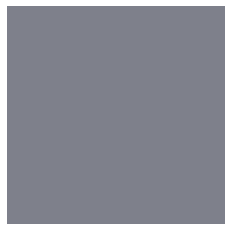

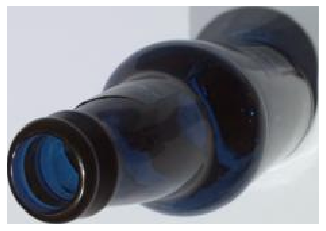

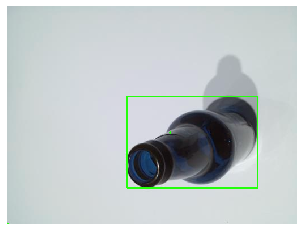

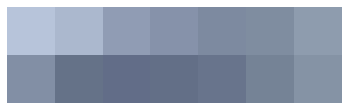

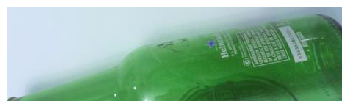

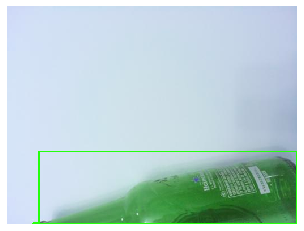

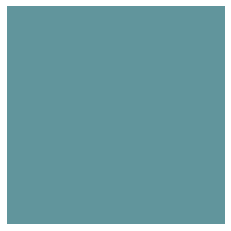

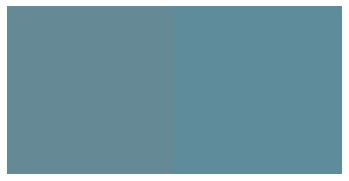

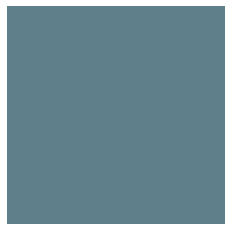

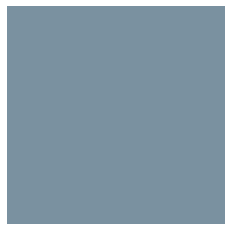

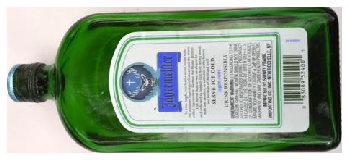

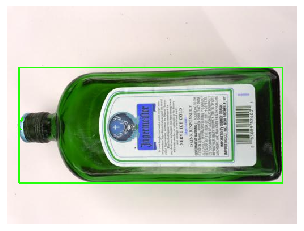

In [8]:
# Load and split image data
trashnet_data_path = '../TrashNet/glass'
trashnet_image_files = os.listdir(trashnet_data_path)
trashnet_img_count = len(trashnet_image_files)
print(f"TrashNet Image Count: {trashnet_img_count}")

images = []

for i, img in enumerate(trashnet_image_files):
    # Show image
    if i < 3:    
        image = cv2.imread(trashnet_data_path + '/' + img)
        

        # Load image, grayscale, Otsu's threshold 
        original = image.copy()
        gray = cv2.cvtColor(image, 6)
        thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

        # Find contours, obtain bounding box, extract and save ROI
        ROI_number = 0
        cnts = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        cnts = cnts[0] if len(cnts) == 2 else cnts[1]
        for c in cnts:
            x,y,w,h = cv2.boundingRect(c)
            cv2.rectangle(image, (x, y), (x + w, y + h), (36,255,12), 2)
            ROI = original[y:y+h, x:x+w]
            cv2.imwrite('ROI_{}.png'.format(ROI_number), ROI)
            
            # Display only bounding box image
            fig,ax = plt.subplots(1)
            plt.axis('off')
            plt.imshow(ROI)
            ROI_number += 1

        # Display original with bounding box
        fig,ax = plt.subplots(1)
        plt.axis('off')
        plt.imshow(image)